In [3]:
#import librabries and dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
#load in the data from the csv, naming df as temp since we are concerned with how temperature affects weekly sales
temp = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')
temp.head(20)

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
5,2010-12-03,16,23.68,2.712,NaN,NaN,NaN,NaN,NaN,6.986,False,28,376.00
6,2010-03-19,16,33.45,2.692,NaN,NaN,NaN,NaN,NaN,7.039,False,28,259.00
7,2010-03-26,16,29.88,2.717,NaN,NaN,NaN,NaN,NaN,7.039,False,28,335.50
8,2010-04-16,16,45.69,2.765,NaN,NaN,NaN,NaN,NaN,6.842,False,28,252.00
9,2010-04-23,16,44.90,2.776,NaN,NaN,NaN,NaN,NaN,6.842,False,28,196.00


In [88]:
temp.describe()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,dept,weekly_sales
count,565968.000000,565968.000000,565968.000000,218718.000000,176788.000000,193110.000000,195086.000000,219530.000000,565968.000000,565968.000000,565968.000000
mean,22.202658,59.935594,3.380391,6711.820854,3990.507119,1903.955017,3088.421352,4136.667212,7.940535,44.250572,15853.395696
std,12.786027,18.213047,0.448673,8498.273561,10472.144994,11372.953000,6750.903612,5381.871617,1.859995,30.488537,22706.098720
min,1.000000,5.540000,2.472000,0.270000,-265.760000,-1.000000,0.410000,135.160000,3.879000,1.000000,-1750.000000
25%,11.000000,47.100000,2.971000,1894.830000,43.000000,4.190000,393.410000,1709.970000,6.885000,18.000000,2060.337500
50%,22.000000,61.880000,3.486000,4703.020000,227.720000,21.050000,1122.080000,3083.260000,7.856000,37.000000,7534.935000
75%,33.000000,73.880000,3.747000,8267.680000,2986.040000,108.480000,2763.630000,5044.430000,8.567000,74.000000,20005.967500
max,45.000000,100.140000,4.449000,88646.760000,104519.540000,141630.610000,67474.850000,105223.110000,14.313000,99.000000,693099.360000


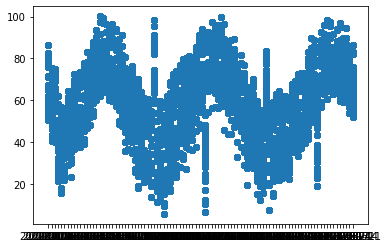

In [92]:
x = temp['sale_date']
y = temp['temperature']
plt.scatter(x, y, marker='o');

In [134]:
#assigning the data to X and y
# X = temp[["fuel_price", "unemployment"]]
# y = temp["weekly_sales"].values.reshape(-1,1)
# print(X.shape, y.shape)

X = temp[["temperature", "weekly_sales"]]
y = temp["weekly_sales"].values.reshape(-1,1)
print(X.shape, y.shape)

(565968, 2) (565968, 1)


In [135]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [136]:
 # Create the model using LinearRegression
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [137]:
# model.fit(X_train, y_train)
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
# score = model.score(X, y)
# print(f"R2 Score: {score}")



# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

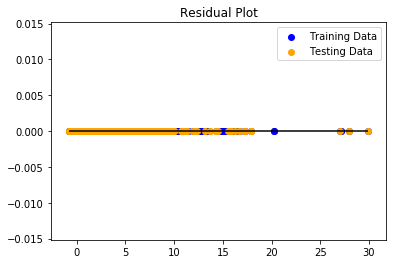

In [139]:
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")


predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3640477439109414e-29, R2: 1.0
